In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Salary_Data.csv')
x_train = data.iloc[:,0] # قراءة العمود الأول
y_train = data.iloc[:,1] # قراءة العنود الثاني
print(len(y_train)) # عدد عينات التدريب
data.head() #إظهار أول خمسة أسطر من البيانات 

30


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


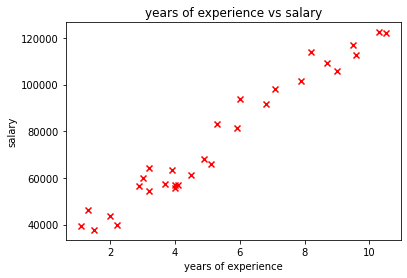

In [ ]:
#رسم مخطط انتشار للبيانات 
plt.scatter(x_train, y_train, marker='x', c='r') 

# تحدبد العنوان
plt.title("years of experience vs salary")
# تحديد عنوان للمحور العمودي
plt.ylabel('salary')
# تحديد عنوان للمحور الأفقي
plt.xlabel('years of experience')
plt.show()

## Cost Function

In [ ]:
def cost_func(x, y, theta_1, theta_0): 
    # عدد عينات التدريب
    m = x.shape[0] 
    #متغير يعبر عن قيمة التكلفة النهائية(يستخدم لاحقاً)
    final_cost = 0
    # متغير لمتابعة قيمة مجموع التكلفة لكل عينة
    cost_sum = 0
    # حلقة دورانية على كل العينات
    for i in range(m):      
        # حساب القيمة المتوقعة لكل عينة
        h = theta_1 * x[i] + theta_0 
        # حساب التكلفة لكل عينة
        cost = (h - y[i]) ** 2 
        # إضافة التكلفة المحسوبة إلى مجموع العينات السابقة
        cost_sum = cost_sum + cost 
    # حساب قيمة التكلفة النهائية
    final_cost = (1 / (2 * m)) * cost_sum 
    return final_cost

## Gradient Descent

In [ ]:
def gradient(x, y, theta_1, theta_0): 
    # عدد عينات التدريب
    m = x.shape[0]
    # (لحساب الانحدار التدريجي النهائي (متغيرات نستخدمها لاحقاً
    j_theta_1 = 0
    j_theta_0 = 0

     # حلقة دورانية على عينات التدريب
    for i in range(m):        
        #حساب القيمة المتوقعة لكل عينة 
        h = theta_1 * x[i] + theta_0
        # حساب الانحدار التدريجي لكل عينة وفق العامل الأول
        j_theta_1_i = (h - y[i]) * x[i] 
        # حساب الانحدار التدريجي لكل عينة وفق العامل الثاني 
        j_theta_0_i = h - y[i]
        # تحديث قيمة الانحدار التدريجي
        j_theta_0 += j_theta_0_i
        j_theta_1 += j_theta_1_i
    # تقسيم الانحدار التدريجي على عدد عينات التدريب 
    j_theta_1 = j_theta_1 / m
    j_theta_0 = j_theta_0 / m
    return j_theta_1, j_theta_0

## Batch Gradient Descent

In [ ]:
def gradient_descent(x, y, theta_1_in, theta_0_in, cost_function, gradient_function, alpha, num_iters): 
    # عدد عينات التدريب
    m = len(x)
    # مصفوفة تخزين بعد كل دورة تدريب
    J_hist = []
    theta_1_hist = []
    theta_1 = copy.deepcopy(theta_1_in)  
    theta_0 = theta_0_in
    for i in range(num_iters):
        # حساب الانحدار التدريجي
        j_theta_1, j_theta_0 = gradient_function(x, y, theta_1, theta_0 )  
        # تحديث العوامل
        theta_1 = theta_1 - alpha * j_theta_1               
        theta_0 = theta_0 - alpha * j_theta_0               
        # تخزين قيمة التكلفة بعد كل دورة

    return theta_1, theta_0

In [ ]:
# تحديد قيم ابتدائية للعوامل
initial_theta_1 = 0.
initial_theta_0 = 0.
iterations = 1500
alpha = 0.01

theta_1,theta_0 = gradient_descent(x_train ,y_train, initial_theta_1, initial_theta_0, 
                     cost_func, gradient, alpha, iterations)
print("theta_1,theta_0 found by gradient descent:", theta_1, theta_0)

theta_1,theta_0 found by gradient descent: 9597.791052916133 24796.02161349117


In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = theta_1 * x_train[i] + theta_0

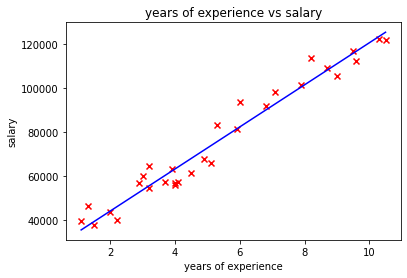

In [ ]:
#رسم خط الانحدار الخطي ضمن مخطط انتشار للبيانات
plt.plot(x_train , predicted,c="b") 
plt.scatter(x_train, y_train, marker='x', c='r') 

# تحدبد العنوان
plt.title("years of experience vs salary")
# تحديد عنوان للمحور العمودي
plt.ylabel('salary')
# تحديد عنوان للمحور الأفقي
plt.xlabel('years of experience')
plt.show()